In [32]:
import matplotlib.pyplot as plt  # 绘图库
import numpy as np
import scipy.optimize as op

In [33]:
data = np.loadtxt('ex2data1.txt')
X = data[:, [0, 1]]

y = data[:, 2]
y = y.reshape((X.shape[0],1))

In [34]:
def plotData(X, y):
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    #print(pos)

    plt.scatter(X[pos, 0], X[pos, 1], color='b', alpha=0.6, label='Admitted')  # 绘制散点图，透明度为0.6
    plt.scatter(X[neg, 0], X[neg, 1], color='y', alpha=0.6, label='Not admitted')  # 绘制散点图，透明度为0.6

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    plt.legend(loc='upper right')
    
    plt.show()

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


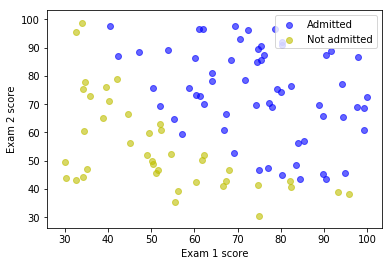

In [35]:
## ==================== Part 1: Plotting ====================
print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.")

plotData(X, y)

In [36]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [37]:
def computeCost(theta, X, y):
    m = X.shape[0]

    hypothesis = sigmoid(np.dot(X, theta))
    J = (np.dot(y.T, np.log(hypothesis)) + np.dot((1 - y).T, np.log(1-hypothesis))) / (-m)

    return J

In [38]:
def computeGradient(theta, X, y):
    m, n = X.shape
    theta = theta.reshape((n,1))
    
    hypothesis = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, hypothesis - y) / m

    return grad.flatten()

In [39]:
## ============ Part 2: Compute Cost and Gradient ============
X = np.c_[np.ones([X.shape[0], 1]), X]    # Add a column of ones to x
m, n = X.shape
initial_theta = np.zeros([n, 1])

# Compute and display initial cost and gradient
cost = computeCost(initial_theta, X, y)
grad = computeGradient(initial_theta, X, y)

print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.zeros([3, 1])
test_theta[0][0] = -24
test_theta[1][0] = 0.2
test_theta[2][0] = 0.2
cost = computeCost(test_theta, X, y)
grad = computeGradient(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: [[0.21833019]]
Expected cost (approx): 0.218
Gradient at test theta:
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647


In [41]:
## ============= Part 3: Optimizing using fminunc  =============
Result = op.minimize(fun = computeCost, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = computeGradient)
theta = Result.x

# Print theta to screen
print('Cost at theta found by fminunc: ', cost)
print('Expected cost (approx): 0.203')
print('theta:')
print(theta)
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc:  [[0.21833019]]
Expected cost (approx): 0.203
theta:
[-25.16131858   0.20623159   0.20147149]
Expected theta (approx):
 -25.161
 0.206
 0.201


In [42]:
def predict(theta, X):
    m = X.shape[0]    # Number of training examples

#    You need to return the following variables correctly
    p = np.zeros([m, 1])
    probability = np.zeros([m, 1])

    for i in range(0, m-1):
        probability[i][0] = sigmoid(np.dot(X[i,:], theta))
    
        if probability[i][0] >= 0.5:
            p[i][0] = 1
        else:
            p[i][0] = 0

    return p

In [43]:
## ============== Part 4: Predict and Accuracies ==============
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print("For a student with scores 45 and 85, we predict an admission probability of", round(prob, 3))
print('Expected value: 0.775 +/- 0.002')

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy:', sum(p == y) * 100 / X.shape[0])
print('Expected accuracy (approx): 89.0')

For a student with scores 45 and 85, we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002
Train Accuracy: [88.]
Expected accuracy (approx): 89.0
